In [1]:
rapunzel = ["Couple longs for child, desires forbidden garden plant.", 
            "Man trades future child for plant to enchantress.", 
            "Enchantress takes newborn Rapunzel, raising her in isolation.", 
            "Rapunzel imprisoned in tower, accessible only by her hair.", 
            "Prince enchanted by Rapunzel's singing, seeks to find her.", 
            "Prince and Rapunzel plan escape using woven silk ladder.",
            "Enchantress discovers escape plan, exiles Rapunzel to desert.",
            "Prince, blinded by despair, reunites with Rapunzel in desert.",
            "Rapunzel's tears restore prince's sight, leading to joyful reunion."]

forest = ["A dark forest with a horse-drawn carriage traveling through it,",
    "Masked robbers emerge from the shadows, creating a sense of danger.",
"The servant-girl, frightened, hides behind a tree while the robbers attack the family.",
"The girl, sitting under a tree, is approached by a gentle white dove carrying a golden key.",
"The tree unfolds to reveal a hidden compartment with food—a dish of milk and white bread.",
"The girl, guided by the dove, opens another tree to find a cozy white bed inside.",
"The girl opens a third magical tree, discovering luxurious garments adorned with gold and jewels.",
"She tries on the elegant clothes, transformed into a fairy-tale figure."]

In [2]:
import torch
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import os
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler, StableDiffusionImg2ImgPipeline

In [3]:
model_id = "stabilityai/stable-diffusion-2"
# model_id = "stabilityai/stable-diffusion-xl-base-1.0"
device = "cuda:3"

scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
text2img_pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler).to(device)
# img2img_pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id).to(device)


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [6]:
def generate_images(story, pipe):
    generated_images = []        
    for idx, prompt in enumerate(story):
        image = pipe(prompt).images[0]
        generated_images.append(image)
    return generated_images
        
# def generate_images_conditional(story, pipe, image_prompts):
#     generated_images = []        
#     for idx, prompt in enumerate(story):
#         init_image = image_prompts[idx]
#         images = pipe(prompt=prompt, image=init_image, strength=0.80, guidance_scale=4.5).images
#         generated_images.append(images[0])
#     return generated_images

def visualize_images(images):
    plt.figure(figsize=(18, 12))
    for num, image in enumerate(images):
        plt.subplot(2,int(len(images)/2),num+1)
        plt.title(num)
        plt.axis('off')
        plt.imshow(image)
        
def generate_images_conditional(story):
    img2img_pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id).to(device)
    init_prompt = story[0]
    init_image = text2img_pipe(init_prompt).images[0]
    
    generated_images = [init_image]
    for idx, prompt in enumerate(story[1:]):   
        images = img2img_pipe(prompt=prompt, image=init_image, strength=0.80, guidance_scale=4.5).images
        generated_images.append(images[0])
    return generated_images

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

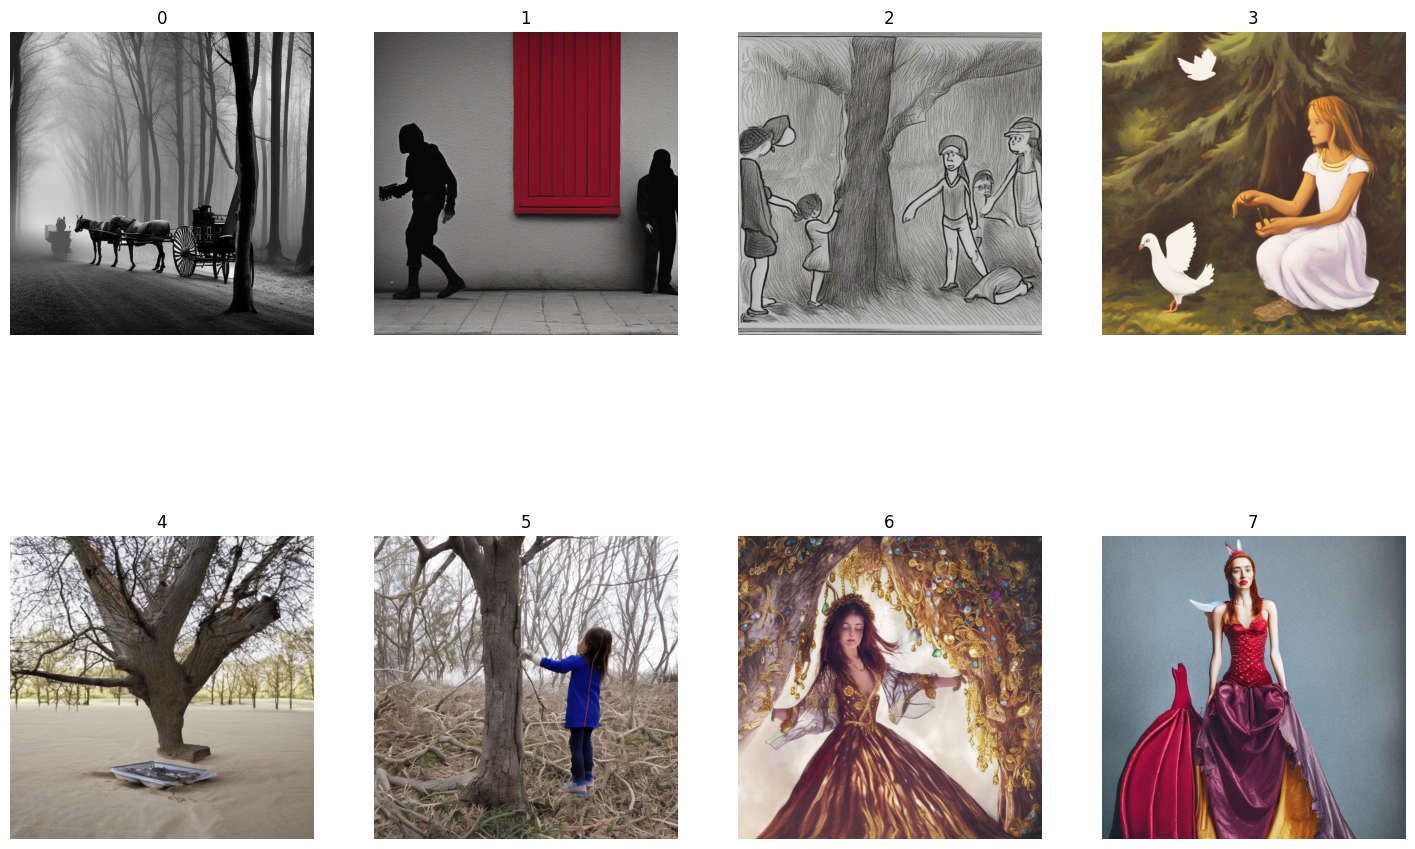

In [5]:
baseline_images = generate_images(forest, text2img_pipe)
visualize_images(baseline_images)

In [7]:
baseline2_images = generate_images_conditional(forest)
visualize_images(baseline2_images)
        



Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 24.00 MiB (GPU 3; 10.76 GiB total capacity; 9.69 GiB already allocated; 24.44 MiB free; 9.79 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF